In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
def infocontent(p):
    
    # Alter the equation below to provide the correct Shannon information 
    # content:

    return -np.log2(p)

def entropy(p):  
    # First make sure the array is now a numpy array
    if type(p) != np.array:
        p = np.array(p)

    # Should we check any potential error conditions on the input?
    if (abs(np.sum(p) - 1) > 0.00001):
        raise Exception("Probability distribution must sum to 1: sum is %.4f" % np.sum(p))
    
    # We need to take the expectation value over the Shannon info content at
    # p(x) for each outcome x:
    weightedShannonInfos = p*(infocontent(p))
    # nansum ignores the nans from calling infocontent(0), but we still get the warning if an entry in p is zero
    return np.nansum(weightedShannonInfos)

In [29]:
""" function jointentropy(p)
Computes the joint Shannon entropy over all outcome vectors x of a vector
random variable X with probability matrix p(x) for each candidate outcome
vector x.

Inputs:
- p - probability distribution function over all outcome vectors x.
   p is a matrix over all combinations of the sub-variables of x,
where p(1,3) gives the probability of the first symbol of sub-variable
x1 co-occuring with the third symbol of sub-variable x2.
   E.g. p = [0.2, 0.3; 0.1, 0.4]. The sum over p must be 1.

Outputs:
- result - joint Shannon entropy of the probability distribution p

Copyright (C) 2020-, Julio Correa, Joseph T. Lizier
Distributed under GNU General Public License v3
"""
def jointentropy(p):
    
	# Should we check any potential error conditions on the input?

	# We need to take the expectation value over the Shannon info content at
	#  p(x) for each outcome x in the joint PDF:
	# Hint: will your code for entropy(p) work, or can you alter it slightly
	#  to make it work?
    
    joint_entropy = entropy(p)
    
    return joint_entropy

In [40]:
# Generate a list of H(Y) within the entire valid domain of alpha.
hy = np.array([])
d = np.arange(0, 1/2, 0.00001)
for i in d:
    distribution = np.array([(3-6*i)/4, 13*i/24, 1/4+23*i/24])
    hy = np.append(hy, entropy(distribution))
hy

/tmp/ipykernel_104262/97584530.py:6: RuntimeWarning: divide by zero encountered in log2
  return -np.log2(p)
/tmp/ipykernel_104262/97584530.py:19: RuntimeWarning: invalid value encountered in multiply
  weightedShannonInfos = p*(infocontent(p))


array([0.81127812, 0.81139364, 0.81149832, ..., 0.84332886, 0.84312275,
       0.84290531])

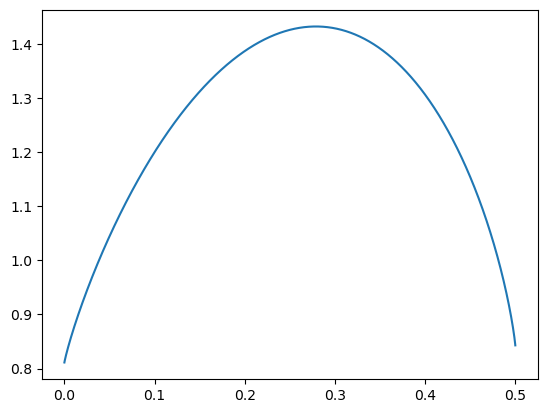

In [42]:
# Plot H(Y)
plt.plot(d, hy)

In [44]:
# Generate a list of H(X|Y) with the entire domain of alpha.
# Hint: H(X|Y) = H(X,Y) - H(Y)
hxy = np.array([])
d = np.arange(0, 1/2, 0.00001)
for i in d:
    distribution = np.array([[(1-2*i)/2, 0, (1-2*i)/4], [5*i/24, i/12, i/4], [i/24, 1/4+2*i/3, i/4]])
    hxy = np.append(hxy, jointentropy(distribution))
post_hxy = hxy - hy
post_hxy

/tmp/ipykernel_104262/97584530.py:6: RuntimeWarning: divide by zero encountered in log2
  return -np.log2(p)
/tmp/ipykernel_104262/97584530.py:19: RuntimeWarning: invalid value encountered in multiply
  weightedShannonInfos = p*(infocontent(p))


array([0.68872188, 0.68876974, 0.68881178, ..., 1.00822511, 1.00822989,
       1.00823467])

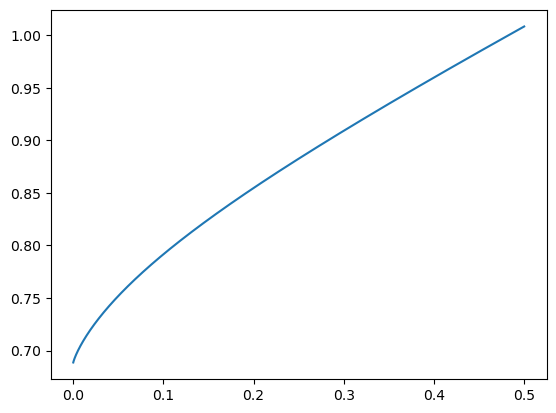

In [49]:
# Plot H(X|Y)
plt.plot(d, post_hxy)

In [48]:
# Generate a list of I(X;Y) with the entire domain of alpha.
# Hint: I(X;Y) = H(X) - H(X|Y)
hx = np.array([])
d = np.arange(0, 1/2, 0.00001)
for i in d:
    distribution = np.array([(2-3*i)/4, 1/4+3*i/4, 1/4])
    hx = np.append(hx, entropy(distribution))
ixy = hx - post_hxy
ixy

array([0.81127812, 0.81123776, 0.81120322, ..., 0.29062207, 0.29059988,
       0.29057768])

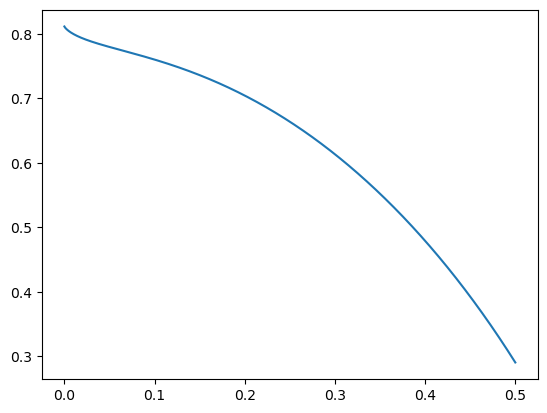

In [50]:
# Plot H(X|Y)
plt.plot(d, ixy)